Notes from [Introduction to Qiskit](https://qiskit.org/documentation/intro_tutorial1.htm)

When using Qiskit a user workflow nominally consists of following four high-level steps:

* Build: Design a quantum circuit(s) that represents the problem you are considering.
* Compile: Compile circuits for a specific quantum service, e.g. a quantum system or classical simulator.
* Run: Run the compiled circuits on the specified quantum service(s). These services can be cloud-based or local.
* Analyze: Compute summary statistics and visualize the results of the experiments.



Total count for 00 and 11 are: {'00': 495, '11': 505}


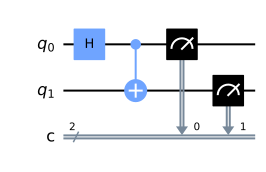

In [4]:
# imports, Python packages
import numpy as np
#from qiskit.providers.aer import QasmSimulator
# https://quantum-computing.ibm.com/lab/docs/iql/high-performance-simulators
# https://lab.quantum-computing.ibm.com/user/6070803ad6cf8633b5e8533e/lab/tree/qiskit-tutorials/qiskit/simulators/1_aer_provider.ipynb
from qiskit import Aer, QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

##########
# BUILD
##########
# Use Aer's qasm_simulator
#simulator = QasmSimulator()
# https://quantum-computing.ibm.com/lab/docs/iql/high-performance-simulators
# https://lab.quantum-computing.ibm.com/user/6070803ad6cf8633b5e8533e/lab/tree/qiskit-tutorials/qiskit/simulators/1_aer_provider.ipynb
simulator = Aer.get_backend('qasm_simulator')
#simulator = Aer.get_backend('aer_simulator')

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)

# Add a H gate on qubit 0
circuit.h(0)

# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

##########
# COMPILE 
##########
# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

##########
# RUN/EXECUTE 
##########
# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)

##########
# ANALYZE
##########
# Draw the circuit
circuit.draw()